In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import matplotlib.pyplot as plt
import seaborn as sns
import onnxruntime as rt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Reading the data
data = pd.read_csv("data_public.csv")
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,3
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,2
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,3
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


### Exploratory Data Analysis

In [3]:
# Checking for null or Missing values 
data.isnull().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

In [4]:
# Checking for duplicate rows
data.duplicated().sum() 

np.int64(0)

In [5]:
# Getting data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB


In [6]:
# Getting data description
data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.068656e+01,-1.883373e+01,7.162152e+01,-1.355120e+01,2.944177e+01,-6.185189e+00,3.174186e+01,5.112504e+01,3.300077e+01,4.092546e+01,7.938340e+01,-6.746540e+00,-4.232290e+01,4.949012e+01,5.980333e+01,2.324106e+00
std,1.292492e+02,1.446355e+01,1.052808e+02,4.689774e+01,7.282278e+01,7.309100e+01,6.660329e+01,1.034053e+02,4.217119e+01,7.694386e+01,9.484003e+01,1.557490e+01,1.791142e+01,6.728231e+01,6.677712e+01,7.211461e-01
min,-7.308940e+01,-8.322357e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-6.271828e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.793679e+01,-1.786669e+01,7.553164e+00,-1.471337e+01,-2.436286e+01,-3.072492e+01,-3.484185e+00,-2.629661e+01,-7.594991e+00,2.108044e+01,2.419273e+00,-8.875128e+00,-5.567326e+01,-7.131906e+00,1.628438e-01,2.000000e+00
50%,-3.197847e+01,-1.369876e+01,1.348796e+01,-8.004308e+00,-1.897058e+01,-2.475391e+01,1.491431e+00,-1.817028e+01,3.769369e+01,2.717432e+01,2.652955e+01,-1.079123e+00,-5.297585e+01,1.462293e+01,4.689262e+01,2.000000e+00
75%,2.280020e+02,-1.055606e+01,2.123439e+02,1.955806e+01,1.289018e+02,7.834417e+01,1.151840e+02,1.915891e+02,7.984842e+01,1.253846e+02,2.046458e+02,3.334451e+00,-2.208504e+01,1.363603e+02,1.451293e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


<Figure size 1200x1000 with 0 Axes>

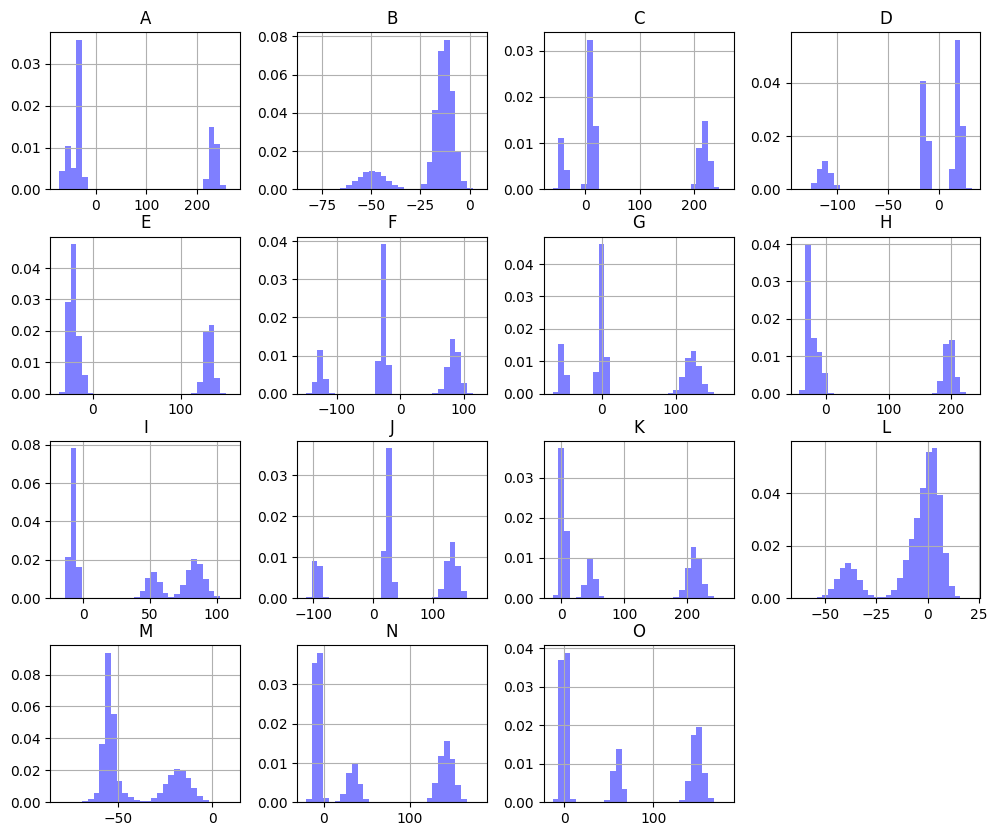

In [7]:
#Histogram
plt.figure(figsize=(12, 10))
data.drop(columns='Class').hist(figsize=(12, 10), bins=30, density=True, alpha=0.5, color='blue')
plt.show()

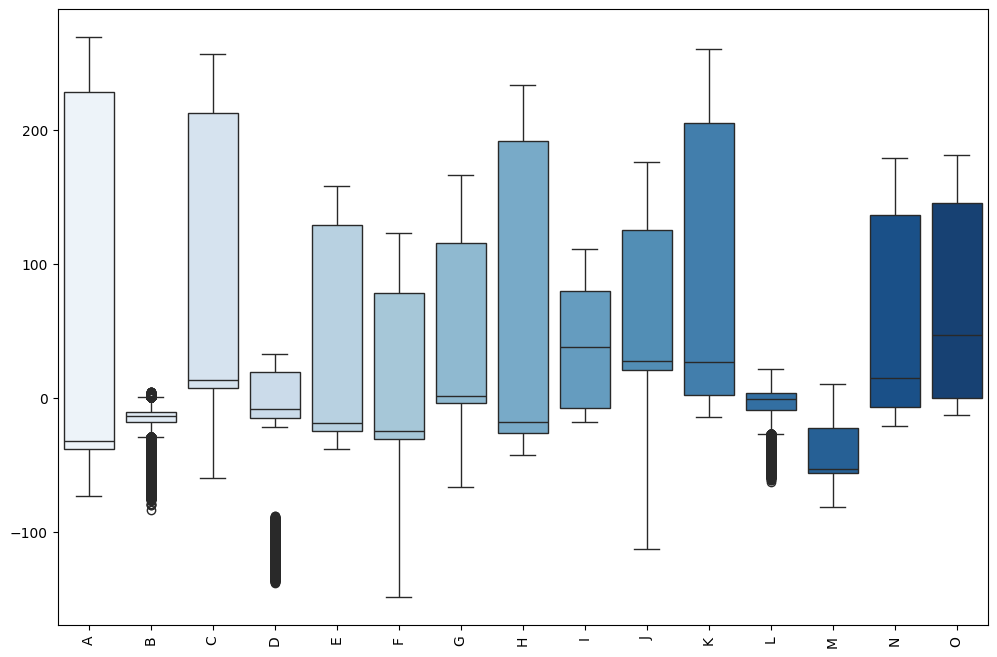

In [8]:
#Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns='Class'), palette='Blues')  
plt.xticks(rotation=90)
plt.show()

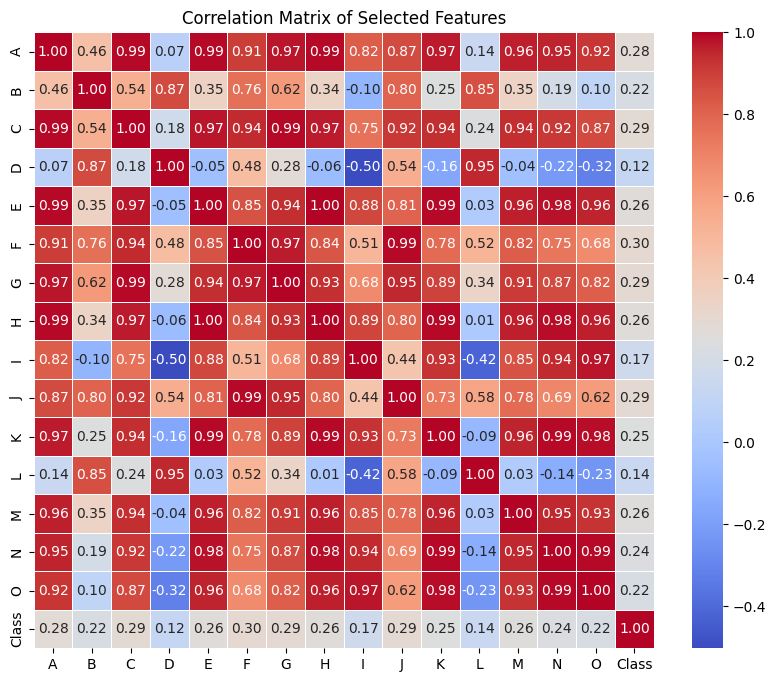

In [9]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

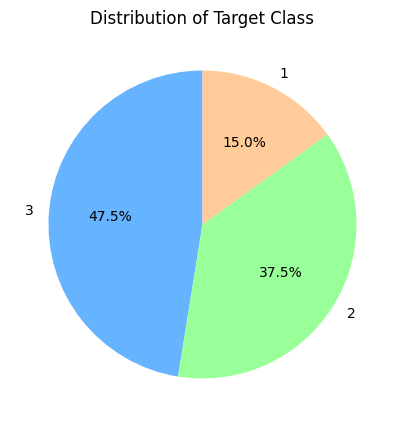

Class distribution in numbers:
Class
3    569521
2    449885
1    180594
Name: count, dtype: int64


In [10]:
# Class distribution
class_distribution = data['Class'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Target Class')
plt.show()

print("Class distribution in numbers:")
print(class_distribution)


### Train Test Split

In [11]:
# Train Test split 
X = data.drop(columns='Class')
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

X_train_copy = X_train
X_test_copy = X_test
y_train_copy = y_train 
y_test_copy = y_test

Training features shape: (960000, 15)
Testing features shape: (240000, 15)
Training target shape: (960000,)
Testing target shape: (240000,)


### Piepline Creation

In [12]:
# Pipeline 
preprocessor = Pipeline([
    ('scaling', StandardScaler()),
])

# Sample process 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_scaled = scaler.transform(X_test_copy)

In [13]:

#Pipeline 
logreg_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=42, solver='lbfgs')

feature_selection = Pipeline([
    ('feature_selection', RFE(logreg_model, n_features_to_select=10))
    ])

# Sample Process 
rfe = RFE(estimator=logreg_model, n_features_to_select=10) 
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train_copy)
X_test_rfe = rfe.transform(X_test_scaled)
print(f"Selected features: {X_train_copy.columns[rfe.support_]}") 

Selected features: Index(['A', 'D', 'E', 'F', 'H', 'I', 'J', 'K', 'N', 'O'], dtype='object')


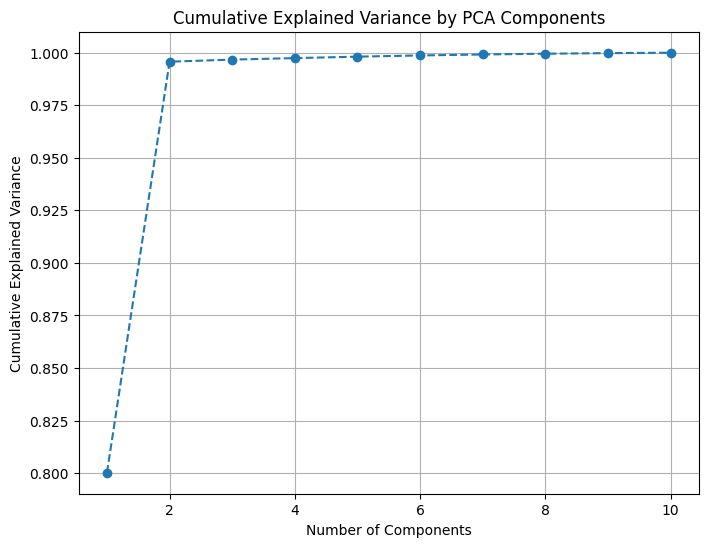

Optimal number of components to retain 95% variance: 2


In [14]:

# PCA optimal Component detection
pca = PCA()
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe) 
evarRatio = pca.explained_variance_ratio_
cVarRatio = np.cumsum(evarRatio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cVarRatio) + 1), cVarRatio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

threshold = 0.95 
optimal_components = np.argmax(cVarRatio >= threshold) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

# Pipeline 
dimension_reduction = Pipeline([
      ('pca', PCA(n_components=2))
])

In [15]:
# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=15,
    min_samples_split=50,
    min_samples_leaf=30,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1,
    verbose=1
)

# Hyperparameter search 
param_dist = {
    'classifier__n_estimators': [50, 100, 200],        
    'classifier__max_depth': [10, 15, 20],              
    'classifier__min_samples_split': [2, 10],           
    'classifier__min_samples_leaf': [1, 5],             
    'classifier__max_features': ['sqrt', 'log2'],      
    'classifier__bootstrap': [True, False],             
    'classifier__criterion': ['gini'],                  
}

# Pipeline 
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('feature_selection', feature_selection),
    ('dimensionality_reduction', dimension_reduction) ,
    ('classifier', rf_model), 
])

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.6s finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('scaling',
                                                               StandardScaler())])),
                                             ('feature_selection',
                                              Pipeline(steps=[('feature_selection',
                                                               RFE(estimator=LogisticRegression(max_iter=1000,
                                                                                                random_state=42),
                                                                   n_features_to_select=10))])),
                                             ('dimensionality_reduction',
                                              Pipeline(steps=[('pca',
                                                               PCA(n_components=2))])),
                                             ('classif...
                                                                     random_state=42,
                                                                     verbose=1))]),
                   n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__criterion': ['gini'],
                                        'classifier__max_depth': [10, 15, 20],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 5],
                                        'classifier__min_samples_split': [2,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   random_state=42, verbose=2)

In [16]:
best_model = random_search.best_estimator_
print("Best hyperparameters found:", random_search.best_params_)
print(classification_report(best_model.predict(X_train),
                            y_train))

Best hyperparameters found: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 'log2', 'classifier__max_depth': 10, 'classifier__criterion': 'gini', 'classifier__bootstrap': True}


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           1       0.56      0.50      0.53    160060
           2       1.00      0.75      0.86    479842
           3       0.56      0.80      0.66    320098

    accuracy                           0.73    960000
   macro avg       0.71      0.68      0.68    960000
weighted avg       0.78      0.73      0.74    960000



In [17]:
print(classification_report(best_model.predict(X_test),
                            y_test))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           1       0.56      0.50      0.53     40080
           2       1.00      0.75      0.86    119984
           3       0.56      0.80      0.66     79936

    accuracy                           0.72    240000
   macro avg       0.71      0.68      0.68    240000
weighted avg       0.78      0.72      0.74    240000



[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [19]:
input_types = [('input', FloatTensorType([None, X_train.shape[1]]))]

try:
    model_onnx = convert_sklearn(best_model, initial_types=input_types
)
except Exception as e:
    print(e)

with open("DPA_PROJECT.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [20]:
import numpy as np
# inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test.to_dict(orient='list').items()}
inputs_onnx = { 'input': np.array(X_test).astype(np.float32) }

session_onnx = rt.InferenceSession("DPA_PROJECT.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [1 1 3 ... 1 1 3]


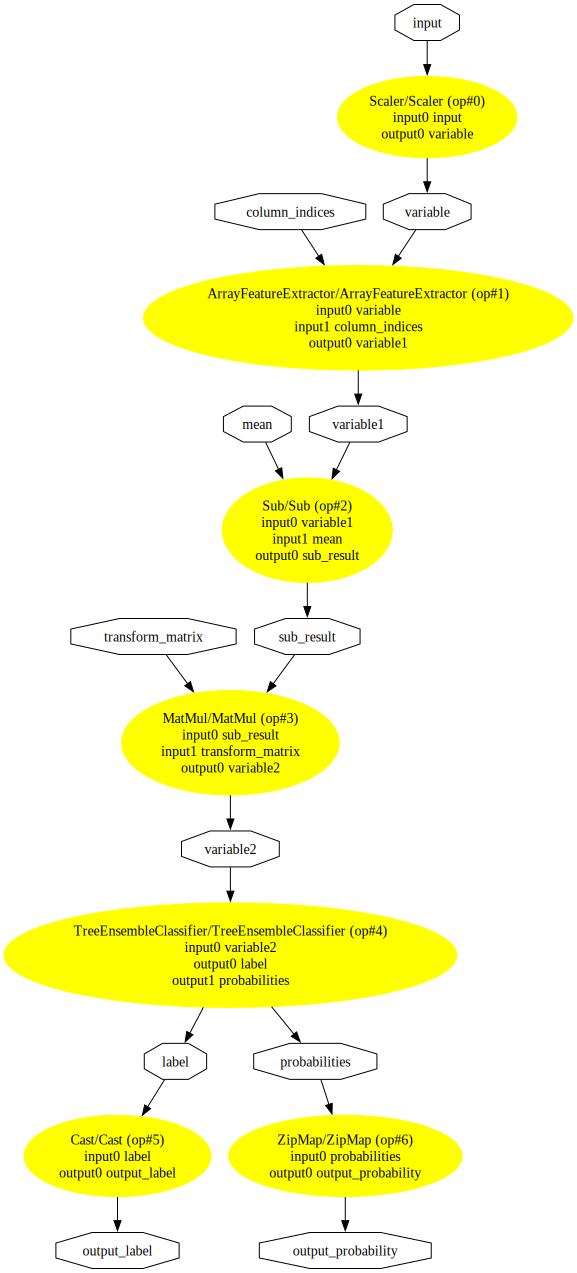

In [21]:
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

import graphviz

pydot_graph = GetPydotGraph(model_onnx.graph,
                            name=model_onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="yellow",
                                                            fillcolor="yellow",
                                                            style="filled"))

graphviz.Source(pydot_graph.to_string())

### Comparison with other models

In [22]:
# Logistic Regression - L2 Penalty 

logreg_model = LogisticRegression(penalty='l2', max_iter=2000, solver='saga', random_state=42)

param_dist = {
    'C': [0.1, 1, 10, 100, 1000], 
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 500, 2000], 
    'tol': [1e-3, 1e-4, 1e-5],
    'class_weight': ['balanced', None],  
}

random_search = RandomizedSearchCV(logreg_model, param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train_pca, y_train_copy)

print(f"Best Hyperparameters: {random_search.best_params_}")

best_model = random_search.best_estimator_
y_pred_copy = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test_copy, y_pred_copy)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n")
print(classification_report(y_test_copy, y_pred_copy))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'tol': 0.001, 'solver': 'liblinear', 'max_iter': 500, 'class_weight': 'balanced', 'C': 1}
Accuracy: 0.7241
Classification Report:

              precision    recall  f1-score   support

           1       0.50      0.56      0.53     36189
           2       0.75      1.00      0.86     89845
           3       0.80      0.56      0.66    113966

    accuracy                           0.72    240000
   macro avg       0.68      0.71      0.68    240000
weighted avg       0.74      0.72      0.71    240000



In [24]:
# Decision Tree Classifier 

dt_model = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [10, 15, 20, None],                
    'min_samples_split': [2, 10, 50],               
    'min_samples_leaf': [1, 10, 30],                 
    'max_features': ['sqrt', 'log2', None],         
    'criterion': ['gini', 'entropy'],               
    'splitter': ['best', 'random'],                 
    'class_weight': ['balanced', None],              
    'max_leaf_nodes': [None, 10, 50],                
    'min_impurity_decrease': [0.0, 0.1, 0.2]       
}

tree_search = RandomizedSearchCV(dt_model, param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
tree_search.fit(X_train_pca, y_train_copy)

print(f"Best Hyperparameters: {random_search.best_params_}")
best_tree_model = tree_search.best_estimator_
y_pred = best_tree_model.predict(X_test_pca)

tree_accuracy = accuracy_score(y_test_copy, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n")
print(classification_report(y_test_copy, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'tol': 0.001, 'solver': 'liblinear', 'max_iter': 500, 'class_weight': 'balanced', 'C': 1}
Accuracy: 0.7241
Classification Report:

              precision    recall  f1-score   support

           1       0.50      0.44      0.47     36189
           2       0.75      1.00      0.86     89845
           3       0.77      0.60      0.67    113966

    accuracy                           0.72    240000
   macro avg       0.67      0.68      0.67    240000
weighted avg       0.72      0.72      0.71    240000

